# Electron Diffraction


In [1]:
using Plots
using CSV, DataFrames
using LaTeXStrings, Latexify
import PhysicalConstants.CODATA2018: e as E, h as h, m_e as M
using Unitful
using LsqFit
import Statistics: std
pgfplotsx();
# pythonplot();

In [2]:
L = 0.135u"m"

0.135 m

## Reading Data through file

In the `.csv` values are in `cm`


In [3]:
# data = CSV.read("data.tsv", delim='\t', DataFrame)
data = CSV.read("data.csv", DataFrame)
# data = CSV.read("data.csv", DataFrame; type=Quantity)

5×2 DataFrame
 Row │ D_1       D_2    
     │ Float64  Float64 
─────┼──────────────────
   1 │  3.0096   4.9972
   2 │  2.6648   4.7232
   3 │  2.4868   4.3544
   4 │  2.3596   4.0988
   5 │  2.2632   3.966

In [4]:
D_1, D_2 = data[!, 1], data[!, 2];
D_1_units, D_2_units = D_1 .* 1u"cm", D_2 .* 1u"cm";

### Calculating the `std` in diameter measurements


In [5]:
relERR_D1 = std(D_1) ./ D_1
relERR_D2 = std(D_2) ./ D_2

5-element Vector{Float64}:
 0.08597632884991217
 0.09096394616547702
 0.09866822306834032
 0.1048211453422419
 0.10833104148481622

In [6]:
U = [i for i in 3000:500:5000]
U_units = U .* 1u"V";

In [7]:
x = 1 ./ sqrt.(U);

## Fitting the Curve with $y = k × x$


In [8]:
@. st_line_origin(x, k) = k[1] * x;

In [9]:
fit_result_1 = curve_fit(st_line_origin, x, D_1, [159.0]);
k1 = fit_result_1.param;
k1_unit = k1[1] * 1u"cm*V^(1/2)"
fit_result_2 = curve_fit(st_line_origin, x, D_2, [159.0]);
k2 = fit_result_2.param;
k2_unit = k2[1] * 1u"cm*V^(1/2)"

k1_unit, k2_unit

(159.91386408748713 cm V^1/2, 276.55779929688856 cm V^1/2)

## Plotting the Graphs (with fit curves)


In [10]:
x_plot = range(0, 0.02, 100);

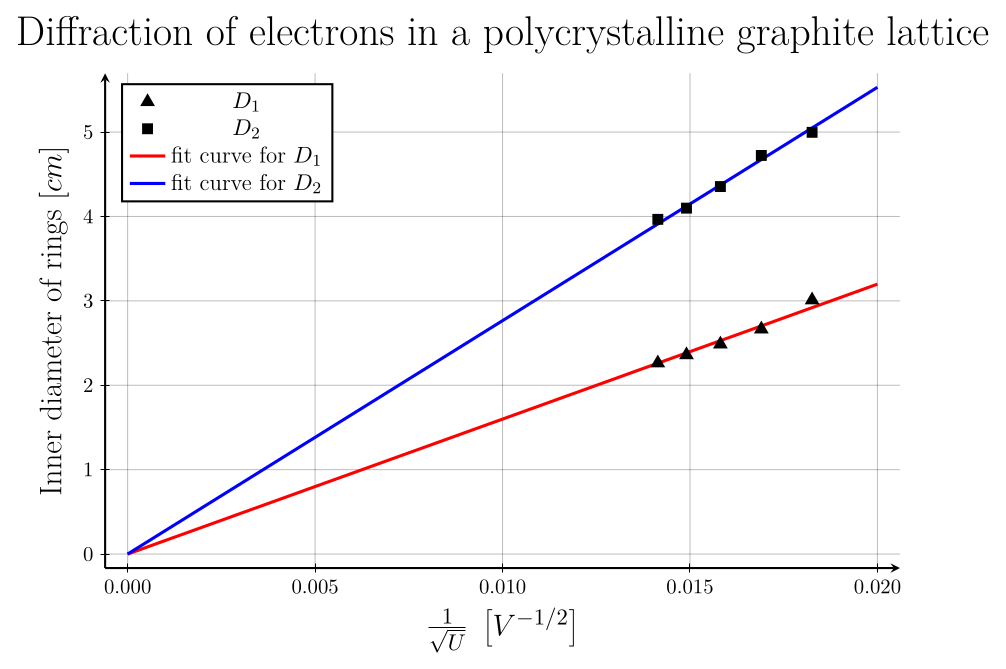

In [11]:
# plot()
fig_width = 11.69
fig_height = 8.27
p = scatter(x, [D_1 D_2], label=[L"D_1" L"D_2"], ms=[4.5 3], shape=[:utriangle :rect], mc=:black)
plot!(x_plot, [st_line_origin(x_plot, k1) st_line_origin(x_plot, k2)], label=[L"fit curve for $D_1$" L"fit curve for $D_2$"], lw=1.5, lc=[:red :blue])
plot!(
    extra_kwargs=Dict(:plot => Dict("height" => "$(fig_height)in", "width" => "$(fig_width)in")),
    dpi=300,
    fontfamily="Computer Modern",
    legendfontsize=11,
    titlefontsize=20,
    tickfontsize=10,
    guidefontsize=15,
    ga=0.25,
    draw_arrow=true,
    formatter=:scientific,
    legend=:topleft
    # tex_output_standalone=true
)
xlabel!(L"\frac{1}{\sqrt{U}} ~ \left[V^{-1/2}\right]")
ylabel!(L"Inner diameter of rings $[cm]$")
title!("Diffraction of electrons in a polycrystalline graphite lattice")
# Plots.pdf("main")
display(p)

## Calculating Lattice spacing


In [12]:
d1_unit = (2 * L * h) / (k1_unit * sqrt(2 * M * E)) |> u"m"
d2_unit = (2 * L * h) / (k2_unit * sqrt(2 * M * E)) |> u"m"

println(round(convert(Float64, d1_unit / 1u"m"), sigdigits=5))
println(round(convert(Float64, d2_unit / 1u"m"), sigdigits=5))

2.0707e-10
1.1973e-10


In [28]:
d1_unit

2.0707085827251352e-10 m

In [29]:
d2_unit

1.1973446842018814e-10 m

In [13]:
relERR_k1 = standard_errors(fit_result_1)[1] * oneunit(k1_unit) / k1_unit
relERR_k2 = standard_errors(fit_result_2)[1] * oneunit(k2_unit) / k2_unit

relERR_k1, relERR_k2

(0.009486312542237653, 0.004768010112138395)

In [14]:
err_d1 = relERR_k1 * d1_unit
err_d2 = relERR_k2 * d2_unit
err_d1, err_d2

(1.9643388799624603e-12 m, 5.708951561989724e-13 m)

$d_1 = (2.0707  ± 0.01964) × 10^{-10} ~\mathrm{m}$

$d_2 = (1.1973 ± 0.00571) × 10^{-10} ~\mathrm{m}$


## Calculate `de Broglie's wavelength`


In [24]:
λ1 = (D_1_units .* d1_unit) / (2 * L) .|> u"pm";
λ2 = (D_2_units .* d2_unit) / (2 * L) .|> u"pm";

In [26]:
λ1

5-element Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(pm,), 𝐋, nothing}}}:
  23.08149833544284 pm
  20.43712678239237 pm
  19.07199297600321 pm
 18.096459154808255 pm
  17.35713949786491 pm

In [27]:
λ2

5-element Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(pm,), 𝐋, nothing}}}:
  22.16063279960608 pm
 20.945549675638244 pm
   19.3100655292173 pm
  18.17657922817285 pm
  17.58766302794319 pm

In [16]:
λ_th = (h) ./ (sqrt.(2 * M * E .* U_units)) .|> u"pm"

5-element Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(pm,), 𝐋, nothing}}}:
 22.391372225829528 pm
 20.730382468161828 pm
 19.391497173161678 pm
 18.282478864669855 pm
 17.344282345873808 pm

In [21]:
relERR_λ1 = sqrt.(relERR_D1 .^ 2 .+ relERR_k1^2);
relERR_λ2 = sqrt.(relERR_D2 .^ 2 .+ relERR_k2^2);

In [22]:
relERR_λ1

5-element Vector{Float64}:
 0.09827853461768266
 0.11088310284476496
 0.11876372188219894
 0.12512616169212873
 0.13042584355397535

In [23]:
relERR_λ2

5-element Vector{Float64}:
 0.08610843769885558
 0.09108882161069631
 0.09878335975200082
 0.1049295307875188
 0.10843591872444493

In [18]:
err_λ1 = λ1 .* relERR_λ1

5-element Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(pm,), 𝐋, nothing}}}:
 2.2684158331878037 pm
 2.2661320308635133 pm
  2.265060869541297 pm
 2.2643404742595408 pm
  2.263819560693055 pm

In [19]:
err_λ2 = λ2 .* relERR_λ2

5-element Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(pm,), 𝐋, nothing}}}:
 1.9082174687920956 pm
   1.90790543794219 pm
 1.9075131500073828 pm
 1.9072599297343378 pm
 1.9071343986509728 pm